In [1]:
import numpy as np

# Matrix Factorization in Tropical and Mixed Tropical-Linear Algebras

## Summary by Violeta Kastreva

## [Link to the paper](https://arxiv.org/abs/2309.13914v1)

This paper delves into Matrix Factorization (MF) within tropical algebra, a promising area in machine learning and data mining. It introduces improved algorithms for Tropical Matrix Factorization (TMF) and presents a novel approach called Tropical Compression (TC) with applications in recommendation systems.

Tropical geometry, merging max-plus algebra and algebraic geometry, is increasingly applied in machine learning contexts. The paper's primary focus is applying matrix factorization techniques in tropical algebra, useful for various applications such as collaborative filtering and data mining.

### Preliminaries

This section outlines the foundational elements of max-plus or tropical algebra, so that we could dive into the machine learning applications afterwards:

- **Underlying Space**: The basic set $  \mathbb{R}_{\text{max}} $  is the union of the real numbers $  \mathbb{R} $  and negative infinity $  -\infty $ . This set forms the space on which tropical algebra is built.
  
- **Operations**: Two primary operations are defined in this space:
  - $ \lor $ (Maximization): Represents the maximum of two elements, serving the role similar to **addition** in conventional algebra.
  - $  + $  (Addition): The usual addition of numbers, which parallels **multiplication** in classical algebraic settings.

- **Vector Space**: In $  \mathbb{R}_{\text{max}}^p $ , the vector space over tropical algebra, the operations are as follows:
  - Internal operation $  \lor $ : Defined entry-wise for vectors, taking the maximum of corresponding entries.
  - External operation $  \lambda + x $ : Scalar addition performed element-wise between a scalar $  \lambda $  and a vector $  x $ .

- **Matrix-Vector Multiplication**: For a matrix $  A $  and a vector $  x $  in tropical space, the multiplication is defined as:
  
  $$
  [A ⊞  x]_i = \max_j (A_{ij} + x_j).
  $$

- **Matrix Multiplication**: Similar to matrix-vector multiplication, but between two matrices $ A $ and $ B $, defined as:

  $$
  [A ⊞ B]_{ij} = \max_l (A_{il} + B_{lj}).
  $$

- **Tropical Polynomials**: These are functions based on max-plus algebra, defined as:

  $$
  p(x) = \bigvee_{i=1}^{m_p} (a_i + b_i^T x),
  $$

  where $  b_i \in \mathbb{R}^n $ , $  a_i \in \mathbb{R}_{\text{max}} $ . A vector of tropical polynomials is called a tropical map.

- **Frobenius Norm**: For any matrix $  A $ , the Frobenius norm is calculated as:

  $$
  \|A\|_F = \sqrt{\sum_{i,j} a_{ij}^2}.
  $$

- **Indicator Function**: Denoted by $  1 $ , it is used to represent binary conditions, such as whether two indices are equal, returning 1 if true, and 0 otherwise.


## Tropical Matrix Factorization (TMF)

The TMF problem focuses on approximating a given matrix $Y$ by finding two matrices $A$ and $B$. The goal is to minimize the Frobenius norm of the difference between $Y$ and the tropical product $A \oplus B$.

## Gradient Descent Formulation

The optimization function $f(A, B) = A ⊞ B$ is piecewise linear. A standard Gradient Descent (GD) approach is used to update the entries of matrices $A$ and $B$ by:

- Identifying the maximizer pair $\pi(i, j)$ for each entry $[A ⊞ B]_{ij}$.
- Updating the entries of $A$ and $B$ by stepping in the direction of the negative gradient, scaled by a step-size $\alpha$.

## Local Minima and Ineffective Entries

To mitigate the issue of "ineffective" entries in $A$ that do not contribute to $A ⊞ B$, the paper proposes a modified GD scheme:

- **Gradient Descent with Multiplicative Noise (GDMN)**: Adjusts ineffective entries of $A$ and $B$, allowing the algorithm to escape local minima.

## Partially Specified Matrices

When $Y$ is only partially known, the optimization problem is adjusted to consider only the known subset of entries, optimizing over this subset.

## Proposed Modifications

The paper proposes two variations of GD to improve TMF outcomes:

- **GDMN**: Introduces a multiplicative noise to adjust ineffective entries and escape poor local minima.
- **GDAN**: Adds stochastic noise to the GD updates, providing an alternative mechanism for avoiding local minima.

The numerical experiments demonstrate the effectiveness of these modifications, especially in scenarios like recommendation systems with partially known data.


## Tropical Compression (TC) Problem

The TC problem seeks to represent a given dataset of data points in $ \mathbb{R}^n $ as the output of a tropical map. Specifically, the aim is to find a lower-dimensional representation of the data points in $ \mathbb{R}^p $ and matrices $ B \in \mathbb{R}^{m \times p} $ and $ A \in \mathbb{R}^{n \times m}_{\text{max}} $ that minimize the difference between the original data points and their tropical transformation:

$$
\min_{A, B, X} \| Y - A ⊞ (BX) \|_F^2,
$$

where $ X $ is the matrix of new data point representations, $ Y $ is the matrix of original data points, and $ B $ is constructed from the vectors $ b_i^T $.

## Motivating Example: Utility Functions in Economics

Consider a scenario with a set of persons and items, where each person's preference is modeled by a utility function based on the features of the items. The utility is a piecewise linear concave function, and the goal is to deduce the unknown features of the items and the slopes of the utility functions, translating this scenario into a tropical compression problem.

## Numerical Algorithm for the TC Problem

To solve the TC problem, we can transform it into an equivalent problem with an additional rank constraint on a new matrix $ C $:

$$
\min_{A \in \mathbb{R}^{n \times m}_{\text{max}}, C \in \mathbb{R}^{m \times N}} \| Y - A ⊞ C \|_F^2, \quad \text{subject to} \quad \text{rank}(C) \leq p.
$$

A projected gradient descent algorithm is proposed to address this problem. The key steps involve:

1. Finding the maximizer pair $ \pi(i, j) $ for each entry.
2. Updating the entries of $ A $ and $ C $ using gradient descent with the inclusion of a multiplicative noise factor.
3. Projecting the updated matrix $ C $ onto the set of matrices with rank less than or equal to $ p $ using singular value decomposition.

This approach enables us to iteratively improve the matrices $ A $ and $ C $ to better approximate the original matrix $ Y $ within the constraints of the tropical algebra framework.


## Example TMF Implementation

In [16]:
import numpy as np

def tropical_product(A, B):
    """Compute the tropical product of matrices A and B."""
    # Expand dimensions of A and B to make them compatible for broadcasting
    expanded_A = A[:, :, np.newaxis]
    expanded_B = B[np.newaxis, :, :]
    # Perform the tropical product operation
    return np.max(expanded_A + expanded_B, axis=1)


def gradient_descent_tmf(Y, r, alpha, epsilon, iterations):
    """Gradient descent for Tropical Matrix Factorization."""
    n, p = Y.shape
    A = np.random.uniform(0, 1, (n, r))
    B = np.random.uniform(0, 1, (r, p))

    for k in range(iterations):
        A_B_product = tropical_product(A, B)
        error = A_B_product - Y
        epsilon_k = epsilon / (500 + k)

        for i in range(n):
            for l in range(r):
                A[i, l] -= alpha * np.sum(error[i, :] * (epsilon_k if l != np.argmax(A_B_product[i, :]) else 1))
        
        for j in range(p):
            for l in range(r):
                B[l, j] -= alpha * np.sum(error[:, j] * (epsilon_k if l != np.argmax(A_B_product[:, j]) else 1))

    return A, B

# Example usage
n, p, r = 10, 11, 5
Y = np.random.uniform(0, 1, (n, p))  # Example matrix
alpha = 0.01  # Learning rate
epsilon = 0.1 
iterations = 10000  # Number of iterations

A, B = gradient_descent_tmf(Y, r, alpha, epsilon, iterations)


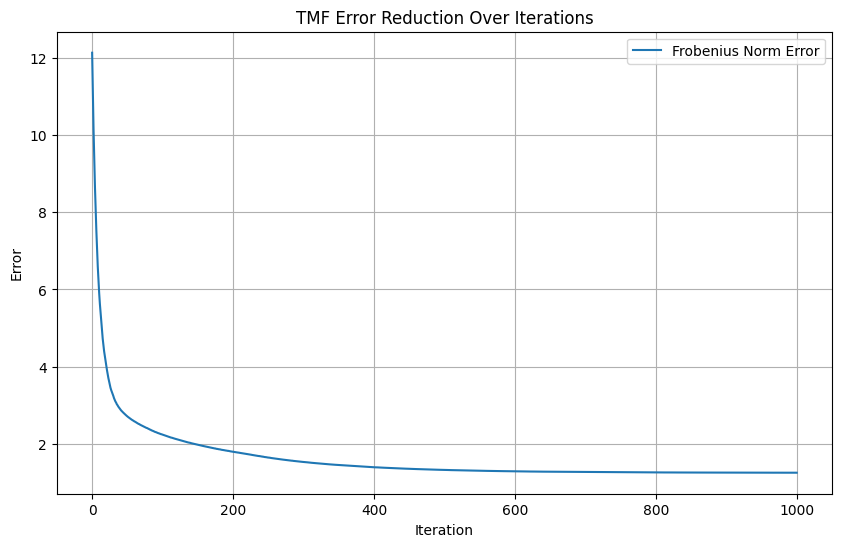

In [21]:
import matplotlib.pyplot as plt

def plot_error_over_iterations(errors, title="TMF Error Reduction Over Iterations"):
    """Plot the error reduction over iterations."""
    plt.figure(figsize=(10, 6))
    plt.plot(errors, label='Frobenius Norm Error')
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


def gradient_descent_tmf(Y, r, alpha, iterations):
    """Simplified Gradient Descent for Tropical Matrix Factorization."""
    n, p = Y.shape
    A = np.random.uniform(0, 1, (n, r))
    B = np.random.uniform(0, 1, (r, p))
    errors = []

    A_initial = A.copy()
    B_initial = B.copy()
    A_mid, B_mid = None, None

    for k in range(iterations):
        A_B_product = tropical_product(A, B)
        error = A_B_product - Y
        errors.append(np.linalg.norm(error, 'fro'))

        # Compute gradients
        grad_A = np.zeros_like(A)
        grad_B = np.zeros_like(B)

        for i in range(n):
            for j in range(p):
                max_idx = np.argmax(A[i, :] + B[:, j])
                grad_A[i, max_idx] += error[i, j]
                grad_B[max_idx, j] += error[i, j]

        # Update A and B
        A -= alpha * grad_A
        B -= alpha * grad_B

        if k == iterations // 2:
            A_mid = A.copy()
            B_mid = B.copy()

    A_final = A
    B_final = B

    return A_initial, B_initial, A_mid, B_mid, A_final, B_final, errors

# Example usage
n, p, r = 10, 11, 5
Y = np.random.uniform(0, 1, (n, p))
alpha = 0.01
iterations = 1000

A_initial, B_initial, A_mid, B_mid, A_final, B_final, errors = gradient_descent_tmf(Y, r, alpha, iterations)

# Now you can plot the errors and display the matrices at different stages
plot_error_over_iterations(errors)






## What We Did: Simplified Explanation
* **Problem Tackled**: We worked on a special kind of problem called Tropical Matrix Factorization (TMF). This involves breaking down a complex matrix (a table of numbers) into simpler components, using rules from tropical algebra - a unique mathematical system different from regular addition and multiplication.

* **Algorithm Used**: We employed an algorithm based on a method called gradient descent. It's like gradually descending down a hill to find the lowest point. Here, 'lowest point' means the best possible simpler components (matrices) that, when combined, closely resemble our original complex matrix.

* **Iterations and Adjustments**: The algorithm iteratively adjusts the components, trying to improve their accuracy in representing the original matrix. We checked these adjustments at different stages: initially, in the middle, and at the end.

* **Error Measurement**: To know how well our algorithm was doing, we measured the error at each step. This error tells us the difference between the original matrix and the combined version of our simpler matrices. Lower error means better accuracy.

## Machine Learning and Data Science Applications
* **Complex Data Interpretation**: In data science, sometimes data is too complex to analyze directly. TMF can simplify this data, making it easier to work with and understand.

* **Pattern Recognition**: TMF can help in recognizing underlying patterns in complex data sets, which is a significant aspect of machine learning.

* **Optimization Problems**: The method we used, gradient descent, is widely applied in machine learning for optimizing various problems - like finding the best settings for a predictive model.

* **Recommender Systems**: In practical applications like movie or product recommender systems, TMF can be used to predict user preferences by simplifying user-item interaction data.

* **Network Analysis**: TMF can also be applied to network analysis, such as understanding social networks or biological networks, by simplifying and highlighting the key connections within these networks.

## Conclusion
In essence, our TMF implementation demonstrates a technique for simplifying complex data, which has diverse applications in machine learning and data science. It's a tool that helps in extracting meaningful insights from data that might otherwise be too complicated to analyze directly.